## Figure 3

In [1]:
# load & install packages
library("pacman")
p_load_gh("paul-buerkner/brms", "reispat/lazerhawk", "anthonynorth/rscodeio", update=FALSE)
p_load("tidyverse", "tidybayes", "car", "pastecs", "lme4", "lmerTest", 
       "sjPlot", "MASS", "nlme", "reshape2", "interplot", "ggpubr", "scales", "RColorBrewer", "ggmcmc", "ggthemes", 
       "ggridges", "ggpubr", "devtools", "ggeffects", "mice", "dplyr", "ggplot2", "readr", "svglite", "grid", 
       "lazerhawk", "gridSVG", "tinytex", "mousetrap", "easystats", "ltm", "misty", update=FALSE)
warnings()

# load & configure rstan, brms & loo
library("rstan")
options(mc.cores=parallel::detectCores())
mc.cores = parallel::detectCores()
rstan_options(auto_write=TRUE)
library("brms")
library("loo")

Loading required package: StanHeaders


rstan version 2.26.13 (Stan version 2.26.1)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)



Attaching package: ‘rstan’


The following object is masked from ‘package:arm’:

    traceplot


The following object is masked from ‘package:pastecs’:

    extract


The following object is masked from ‘package:tidyr’:

    extract


This is loo version 2.5.1

- Online documentation and vignettes at mc-stan.org/loo

- As of v2.0.0 loo defaults to 1 core but we recommend using as many as possible. Use the 'cores' argument or set options(mc.cores = NUM_CORES) for an entire session. 


Attaching package: ‘loo’


The following ob

In [2]:
# load data
ds_accs_df_acoustic <- read.csv("./data/bayes/ds_accs_df_acoustic.csv")
ds_accs_df_acoustic$subject_id <- as.factor(ds_accs_df_acoustic$subject_id)
ds_accs_df_acoustic$distractor <- as.factor(ds_accs_df_acoustic$distractor)

ds_accs_df_lip <- read.csv("./data/bayes/ds_accs_df_lip.csv")
ds_accs_df_lip$subject_id <- as.factor(ds_accs_df_lip$subject_id)
ds_accs_df_lip$distractor <- as.factor(ds_accs_df_lip$distractor)

# z-score variables
ds_accs_df_acoustic$acc_avg_z = scale(ds_accs_df_acoustic$acc_avg, center=TRUE, scale=TRUE)
ds_accs_df_acoustic$performance_z = scale(ds_accs_df_acoustic$performance, center=TRUE, scale=TRUE)
ds_accs_df_acoustic$difficulty_z = scale(ds_accs_df_acoustic$difficulty, center=TRUE, scale=TRUE)
ds_accs_df_acoustic$motivation_z = scale(ds_accs_df_acoustic$motivation, center=TRUE, scale=TRUE)

ds_accs_df_lip$acc_avg_z = scale(ds_accs_df_lip$acc_avg, center=TRUE, scale=TRUE)
ds_accs_df_lip$performance_z = scale(ds_accs_df_lip$performance, center=TRUE, scale=TRUE)
ds_accs_df_lip$difficulty_z = scale(ds_accs_df_lip$difficulty, center=TRUE, scale=TRUE)
ds_accs_df_lip$motivation_z = scale(ds_accs_df_lip$motivation, center=TRUE, scale=TRUE)

In [3]:
# calculate models (acoustic)
# performance ~ neural tracking
model_aud_perf <- brm(performance ~ 1 + acc_avg + (1 | subject_id),
                      data=ds_accs_df_acoustic, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_aud_perf_z <- brm(performance_z ~ 1 + acc_avg_z + (1 | subject_id),
                      data=ds_accs_df_acoustic, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
# difficulty ~ neural tracking
model_aud_diff <- brm(difficulty ~ 1 + acc_avg + (1 | subject_id),
                      data=ds_accs_df_acoustic, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_aud_diff_z <- brm(difficulty_z ~ 1 + acc_avg_z + (1 | subject_id),
                      data=ds_accs_df_acoustic, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

# motivation ~ neural tracking
model_aud_mot <- brm(motivation ~ 1 + acc_avg + (1 | subject_id),
                      data=ds_accs_df_acoustic, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
model_aud_mot_z <- brm(motivation_z ~ 1 + acc_avg_z + (1 | subject_id),
                      data=ds_accs_df_acoustic, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling

Compiling Stan program...

Start sampling



In [7]:
# show models (acoustic)
print("performance ~ neural tracking")
brms_SummaryTable(model_aud_perf, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_aud_perf_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("difficulty ~ neural tracking")
brms_SummaryTable(model_aud_diff, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_aud_diff_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("motivation ~ neural tracking")
brms_SummaryTable(model_aud_mot, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_aud_mot_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

# get lower CI < 0.00
effect <- brms::fixef(model_aud_mot_z, probs=c(0.055, 0.945))
round(effect[2, 3], 3)

[1] "performance ~ neural tracking"


| Covariate | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:----------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept |    59.10 |      4.93 |    51.21 |    66.86 |    100.00 |            Inf |    *    |
| acc_avg   |   115.32 |     53.74 |    29.94 |   201.51 |     98.31 |          58.19 |    *    |



| Covariate | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:----------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept |     0.01 |      0.15 |    -0.23 |     0.25 |     53.64 |           1.16 |         |
| acc_avg_z |     0.29 |      0.14 |     0.07 |     0.51 |     98.37 |          60.19 |    *    |

[1] "difficulty ~ neural tracking"


| Covariate | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:----------|---------:|----------:|---

[1] 0.004

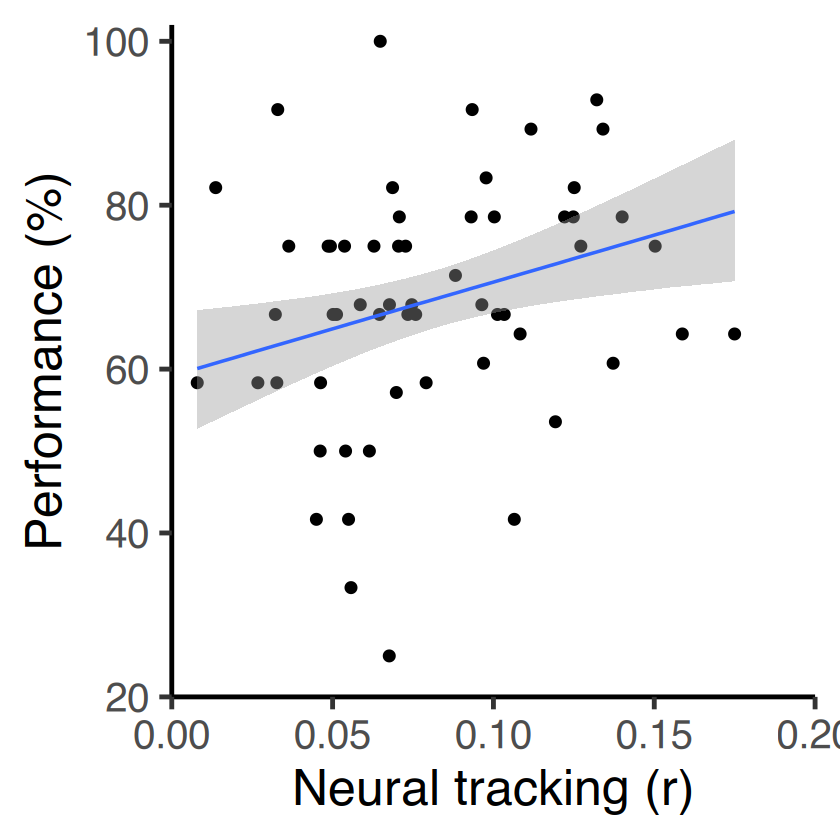

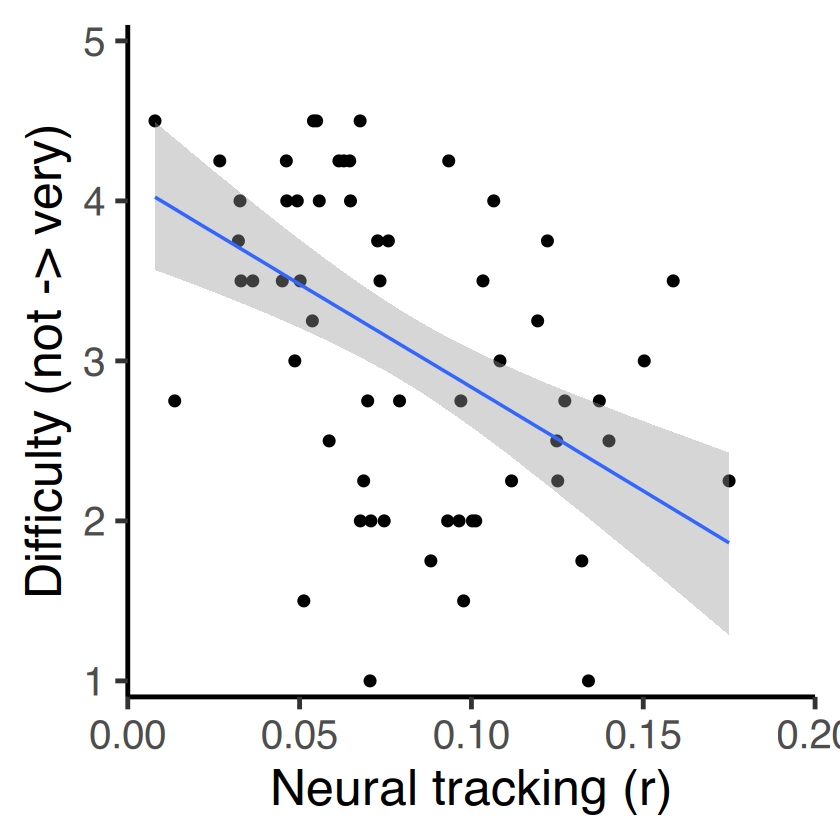

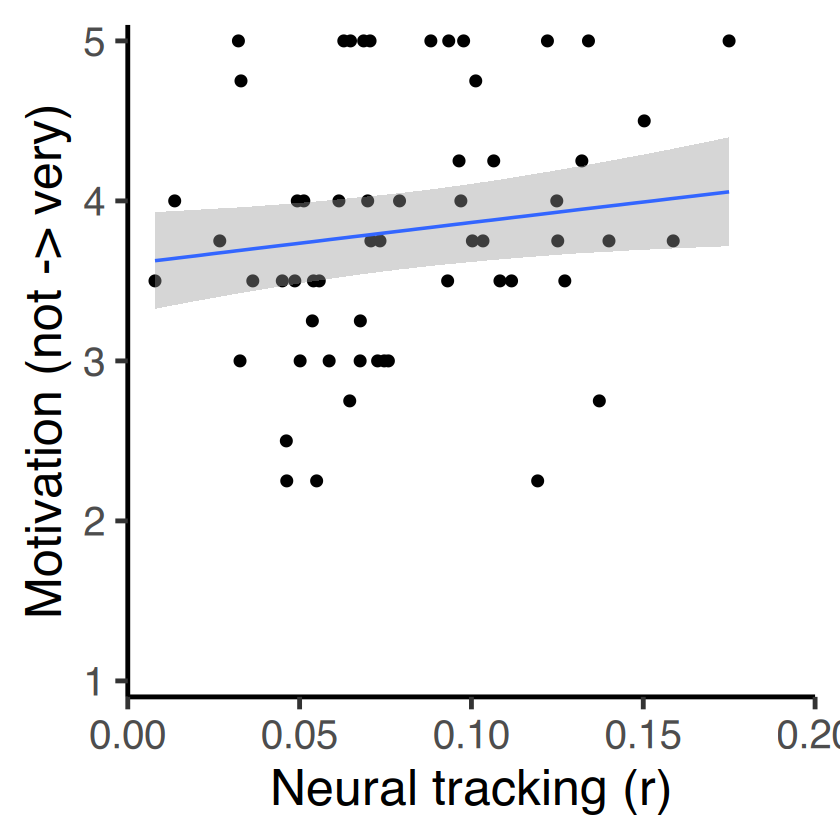

In [23]:
# plot models (acoustic)
# performance
c_eff_perf_aud <- plot(conditional_effects(model_aud_perf, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_perf_aud_plot <- c_eff_perf_aud[[1]] + xlab("Neural tracking (r)") + ylab("Performance (%)") +
  theme_classic(base_size=30) +
  scale_x_continuous(expand=c(0, 0), limits=c(0, 0.2)) + scale_y_continuous(expand=c(0, 0), limits=c(20, 102))
c_eff_perf_aud_plot

# difficulty
c_eff_diff_aud <- plot(conditional_effects(model_aud_diff, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_diff_aud_plot <- c_eff_diff_aud[[1]] + xlab("Neural tracking (r)") + ylab("Difficulty (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(0, 0.2)) + scale_y_continuous(expand=c(0, 0), limits=c(0.9, 5.1))
c_eff_diff_aud_plot

# motivation
c_eff_mot_aud <- plot(conditional_effects(model_aud_mot, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_mot_aud_plot <- c_eff_mot_aud[[1]] + xlab("Neural tracking (r)") + ylab("Motivation (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(0, 0.2)) + scale_y_continuous(expand=c(0, 0), limits=c(0.9, 5.1))
c_eff_mot_aud_plot

Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


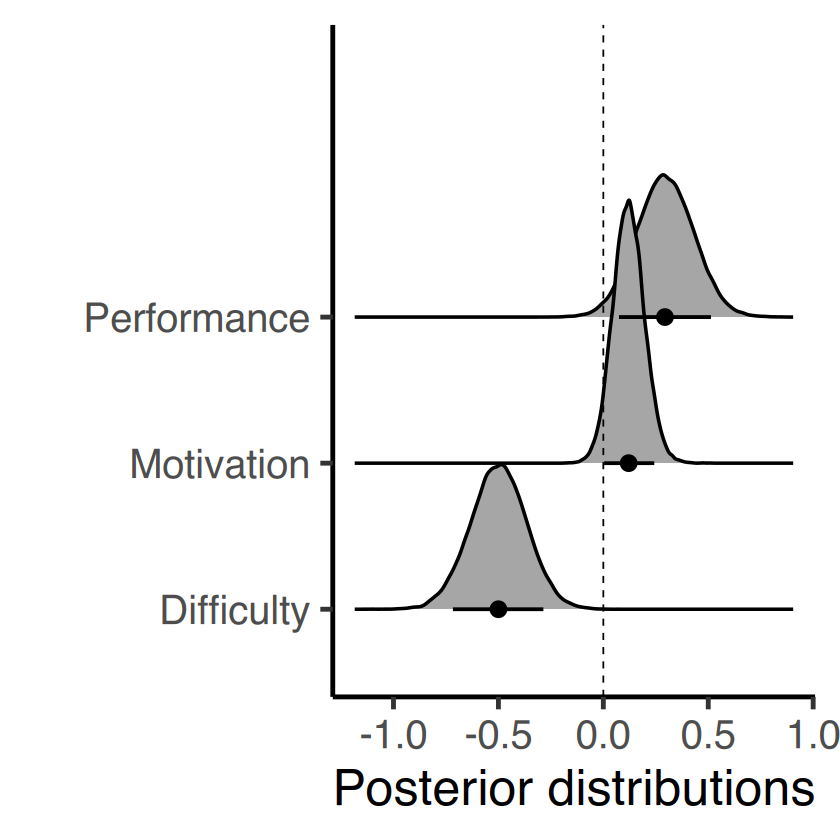

In [54]:
# plot posterior distributions (acoustic)
post_aud_perf <- posterior_samples(model_aud_perf_z)
post_aud_diff <- posterior_samples(model_aud_diff_z)
post_aud_mot <- posterior_samples(model_aud_mot_z)

# merge all posteriors to dataframe
posteriors_aud <- bind_rows(post_aud_perf, post_aud_diff, post_aud_mot) %>% 
  mutate(priors = c("Performance", "Difficulty", "Motivation") 
         %>% rep(., each = length(post_aud_perf$b_acc_avg)))

# plot all posteriors
posteriors_aud_plot <- ggplot(data=posteriors_aud, aes(x = b_acc_avg_z, y = priors)) + 
  stat_halfeye(height=2, width=60, slab_color="black", expand=TRUE, trim=FALSE, .width=0.89, point_interval = "mean_qi", 
               point_size=4, interval_size=4) + theme_classic(base_size=30) + 
  geom_vline(xintercept=0, linetype="dashed") + xlab("Posterior distributions") + ylab("")
posteriors_aud_plot

In [17]:
# calculate models (lip)
# performance ~ neural tracking
model_lip_perf <- brm(performance ~ 1 + acc_avg + (1 | subject_id),
                      data=ds_accs_df_lip, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_lip_perf_z <- brm(performance_z ~ 1 + acc_avg_z + (1 | subject_id),
                      data=ds_accs_df_lip, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
# difficulty ~ neural tracking
model_lip_diff <- brm(difficulty ~ 1 + acc_avg + (1 | subject_id),
                      data=ds_accs_df_lip, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

model_lip_diff_z <- brm(difficulty_z ~ 1 + acc_avg_z + (1 | subject_id),
                      data=ds_accs_df_lip, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

# motivation ~ neural tracking
model_lip_mot <- brm(motivation ~ 1 + acc_avg + (1 | subject_id),
                      data=ds_accs_df_lip, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)
                      
model_lip_mot_z <- brm(motivation_z ~ 1 + acc_avg_z + (1 | subject_id),
                      data=ds_accs_df_lip, init_r=0.1, warmup=500, iter=10000, control=list(adapt_delta=0.99,
                                                                                            max_treedepth=12), family=student,
                      cores=mc.cores, chains=4, seed=777)

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling

Compiling Stan program...

recompiling to avoid crashing R session

Start sampling



In [18]:
# show models (lip)
print("performance ~ neural tracking")
brms_SummaryTable(model_lip_perf, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_lip_perf_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("difficulty ~ neural tracking")
brms_SummaryTable(model_lip_diff, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_lip_diff_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

print("motivation ~ neural tracking")
brms_SummaryTable(model_lip_mot, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)
brms_SummaryTable(model_lip_mot_z, panderize=TRUE, astrology=TRUE, hype=TRUE, seed=777)

[1] "performance ~ neural tracking"


| Covariate | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:----------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept |    67.87 |      2.76 |    63.54 |    72.32 |    100.00 |            Inf |    *    |
| acc_avg   |    37.33 |     93.01 |  -111.70 |   183.18 |     65.98 |           1.94 |         |



| Covariate | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:----------|---------:|----------:|---------:|---------:|----------:|---------------:|:-------:|
| Intercept |     0.02 |      0.15 |    -0.21 |     0.26 |     57.00 |           1.33 |         |
| acc_avg_z |     0.06 |      0.14 |    -0.18 |     0.28 |     65.61 |           1.91 |         |

[1] "difficulty ~ neural tracking"


| Covariate | Estimate | Est.Error | l-89% CI | u-89% CI | B > 0 (%) | Evidence Ratio | Notable |
|:----------|---------:|----------:|---

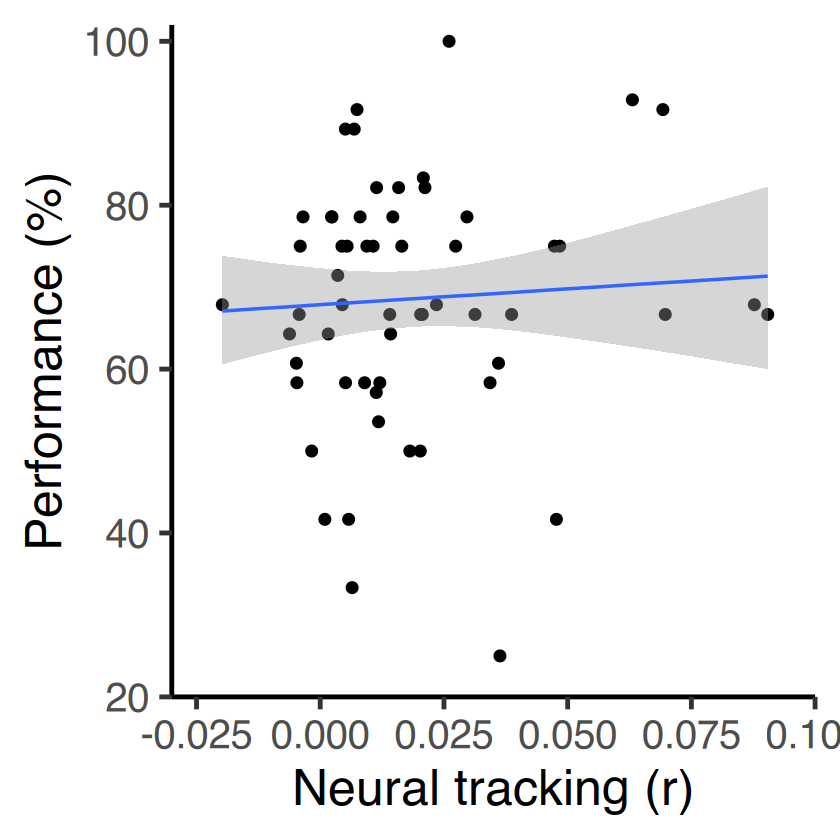

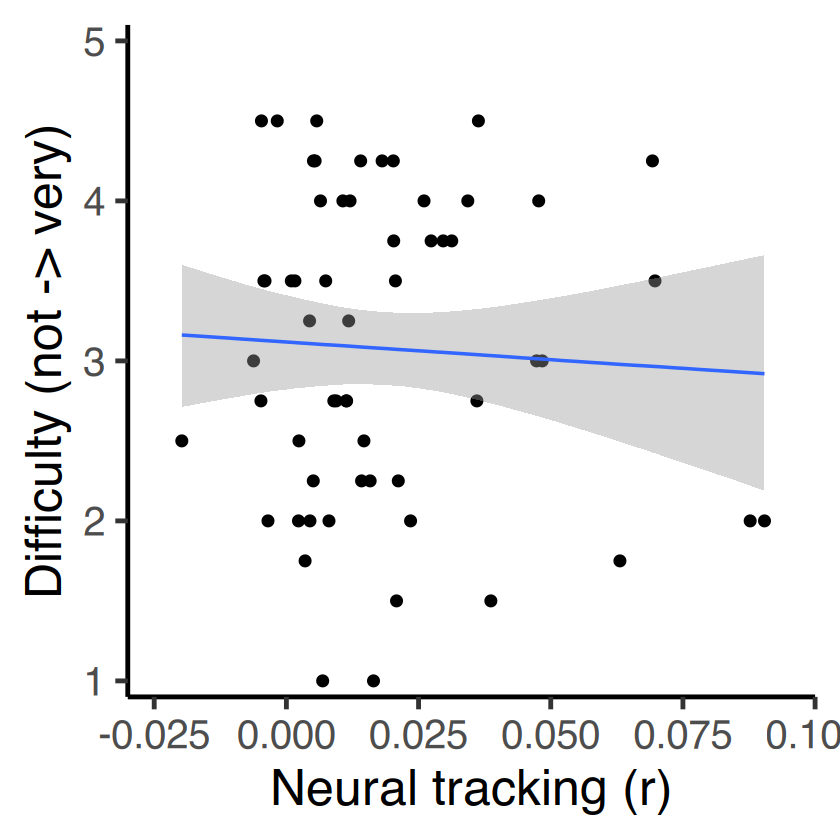

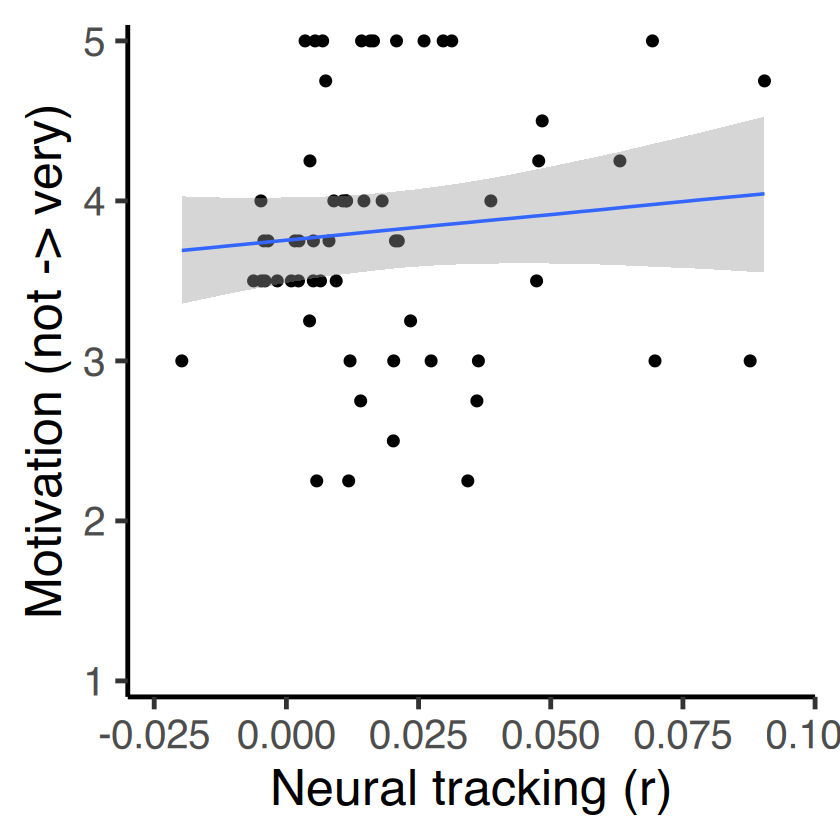

In [30]:
# plot models (lip)
# performance
c_eff_perf_aud <- plot(conditional_effects(model_lip_perf, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_perf_aud_plot <- c_eff_perf_aud[[1]] + xlab("Neural tracking (r)") + ylab("Performance (%)") +
  theme_classic(base_size=30) +
  scale_x_continuous(expand=c(0, 0), limits=c(-0.03, 0.1)) + scale_y_continuous(expand=c(0, 0), limits=c(20, 102))
c_eff_perf_plot

# difficulty
c_eff_diff_aud <- plot(conditional_effects(model_lip_diff, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_diff_aud_plot <- c_eff_diff_aud[[1]] + xlab("Neural tracking (r)") + ylab("Difficulty (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(-0.03, 0.1)) + scale_y_continuous(expand=c(0, 0), limits=c(0.9, 5.1))
c_eff_diff_aud_plot

# motivation
c_eff_mot_aud <- plot(conditional_effects(model_lip_mot, prob = 0.89), points=TRUE, point_args=list(size = 3), plot=FALSE)

c_eff_mot_aud_plot <- c_eff_mot_aud[[1]] + xlab("Neural tracking (r)") + ylab("Motivation (not -> very)") + 
  theme_classic(base_size=30) + 
  scale_x_continuous(expand=c(0, 0), limits=c(-0.03, 0.1)) + scale_y_continuous(expand=c(0, 0), limits=c(0.9, 5.1))
  c_eff_mot_aud_plot

Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”
Warning message:
“Method 'posterior_samples' is deprecated. Please see ?as_draws for recommended alternatives.”


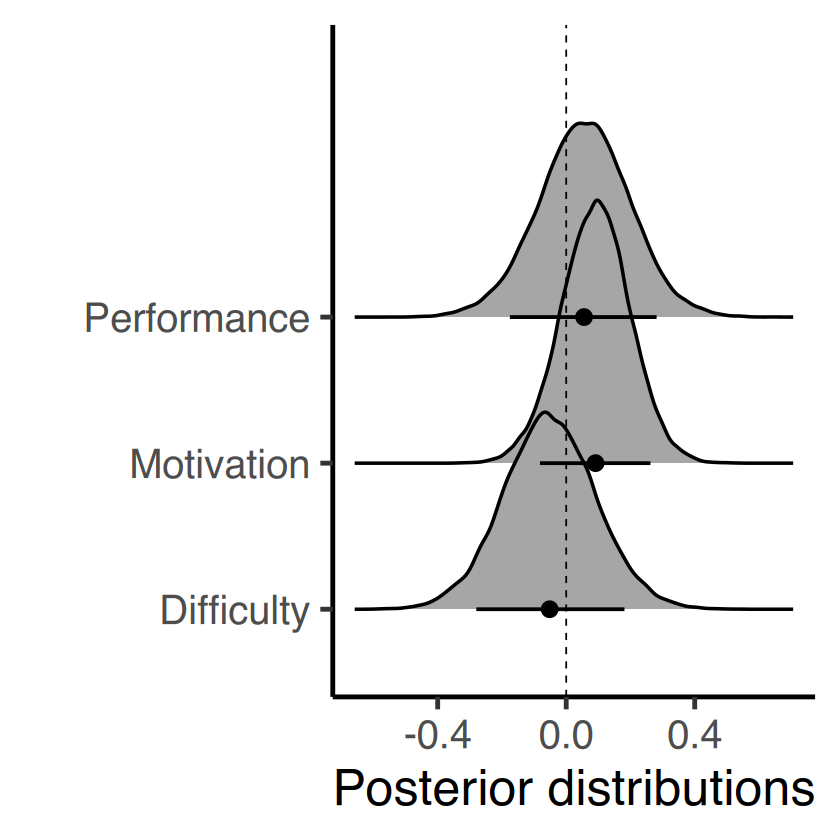

In [53]:
# plot posterior distributions (lip)
post_lip_perf <- posterior_samples(model_lip_perf_z)
post_lip_diff <- posterior_samples(model_lip_diff_z)
post_lip_mot <- posterior_samples(model_lip_mot_z)

# merge all posteriors to dataframe
posteriors_lip <- bind_rows(post_lip_perf, post_lip_diff, post_lip_mot) %>% 
  mutate(priors = c("Performance", "Difficulty", "Motivation") 
         %>% rep(., each = length(post_lip_perf$b_acc_avg)))

# plot all posteriors
posteriors_lip_plot <- ggplot(data=posteriors_lip, aes(x = b_acc_avg_z, y = priors)) + 
  stat_halfeye(height=2, width=60, slab_color="black", expand=TRUE, trim=FALSE, .width=0.89, point_interval = "mean_qi", 
               point_size=4, interval_size=4) + theme_classic(base_size=30) + 
  geom_vline(xintercept=0, linetype="dashed") + xlab("Posterior distributions") + ylab("")
posteriors_lip_plot